In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [2]:
x = np.loadtxt('02_24_data.txt')

In [3]:
pi = np.array([0.3, 0.7])   # mixing coefficients
assert np.isclose(pi.sum(), 1), "The mixing coefficients don't add up to 1"
mu = np.array([0.3, 0.8])    # means
sigma = np.array([0.1, 0.1])  # variances

In [4]:
xx = np.linspace(0, 1, 500)
p = np.zeros((2, 500), dtype=np.float64)

In [5]:
for n in range(len(pi)):
    p[n] = pi[n] * norm.pdf(xx, loc=mu[n], scale=sigma[n])
p_gmm = p.sum(axis=0)

# Plot KDE with Gaussian kernel

In [6]:
h_list = [0.005, 0.07, 0.2]

In [11]:
def calculate_kde(x, xx, h):
    N = len(x)
    tmp = np.zeros_like(xx)
    for x_n in x:
        tmp += (1 / np.sqrt(2 * np.pi * h ** 2)) * np.exp(- ((xx - x_n) ** 2) / (2 * h ** 2))  # (2.250)
    density = tmp / N
    return density

In [69]:
def plot_kde(x, h_list):
    fig, ax = plt.subplots(3, 1, figsize=(6, 4.5))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    for i, h in enumerate(h_list):
        density = calculate_kde(x, xx, h)
        
        kde = KernelDensity(kernel="gaussian", bandwidth=h).fit(x.reshape(-1, 1))
        log_dens = kde.score_samples(xx.reshape(-1, 1))
        
        ax[i].plot(xx, np.exp(log_dens), 'r', lw=3, label='sklearn')
        ax[i].plot(xx, density, 'b', lw=1, label='manual') 
        ax[i].plot(xx, p_gmm, 'g', lw=2)
        ax[i].set_xticks([0, 0.5, 1])
        ax[i].set_yticks([0, 5])
        ax[i].set_xlim(0, 1)
        ax[i].set_ylim(0, 5)
        ax[i].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
        
        if i==2:
            ax[i].legend(loc='upper center', frameon=False)
        ax[i].text(0.04, 3.8, f'h = {h}', fontsize=12)

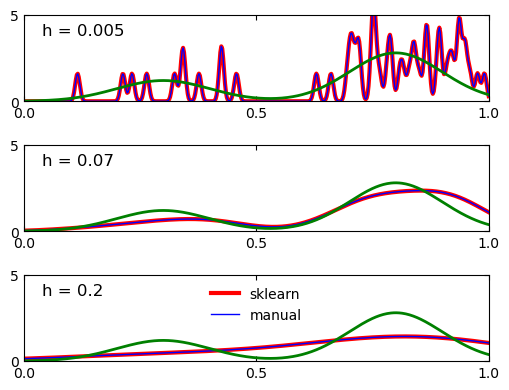

In [70]:
plot_kde(x, h_list)